In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
rng = np.random.default_rng(1729)

# Fill Queue (Uniform)

## The Filling Method

In this approach, we will seek fill every team as the parties arrive

In [11]:
# Queue: 5 3 1 1 4 2 5 2 1 3

# The 5 is matched and ready to go
# Teams: [5]
# Queue 3 1 1 4 2 5 2 1 3

# Create a new line with 3 as the sole member so far
# Teams: [5]
# Lines: [3]
# Queue: 1 1 4 2 5 2 1 3

# 1 can fit into the first created line
# Teams: [5]
# Lines: [3, 1]
# Queue: 1 4 2 5 2 1 3

# 1 can still fit into the first created line. That fills it up and we move on
# Teams: [5]
# Lines: [3, 1, 1]
# Queue: 4 2 5 2 1 3

# Create a new line with 3 as the sole member so far
# Teams: [5] [3,1,1]
# Lines: [4]
# Queue: 2 5 2 1 3

# 2 cannot fit in our most recent line so create a new one with 2 as the sole member
# Teams: [5] [3,1,1]
# Lines: [4] [2]
# Queue: 5 2 1 3

In [12]:
def FillWaitTime(line):
    last_val = line[len(line) - 1][0]
    waits = []
    for i in range(len(line)):
        temp = line[i]
        waits.append(last_val - temp[0])
    return sum(waits)/len(waits)

def FillWeightTime(line):
    last_val = line[len(line) - 1]
    waits = []
    for i in range(len(line)):
        temp = line[i]
        waits.append((last_val[0]-temp[0])*temp[1])
    return sum(waits)/5

        

def CreatePartyFill(arrivals,sizes):
    c_arr = np.cumsum(arrivals)
    df = pd.DataFrame({'Arrival Time': c_arr, 'Party Size': sizes, 'Time Passed':arrivals})

    waits = []
    weights = []
    lines = []
    fulls = []

    for i in range(len(arrivals)):
        val = df.iloc[i]
        party = int(val[1])
        
        # if the party size is 5, mark wait time as zero
        if party == 5:
            waits.append(0)
            weights.append(0)
            fulls.append([val])
            continue

        added = False

        # if there are no groups waiting to be filled, create one
        if lines == []:
            lines.append([val])
            continue
        
        # loop thru all groups waiting
        for x in range(len(lines)):

            # find size of this group
            group = lines[x]
            temp = 0
            for g in group:
                temp += g[1]

            # if adding this party exceeds 5, go to next one
            if (temp + party) > 5:
                continue

            # if adding this party equals 5, pop it and add the mean wait time of everyone
            # and exit loop
            elif (temp + party) == 5:
                lines[x].append(val)
                temp = lines.pop(x)
                waits.append(FillWaitTime(temp))
                weights.append(FillWeightTime(temp))
                fulls.append(temp)
                added = True
                break

            # if this group has room for another party add them
            # and exit loop
            elif (temp + party) < 5:
                lines[x].append(val)
                added = True
                break
        
        # if no one was added to the party, make a new group
        if (added == False):
            lines.append([val])

    return waits,weights,lines,fulls

### Match Test with set 10 parties

In [13]:
arrivals = rng.uniform(0,5, size=10)
sizes = [5, 3, 1, 1, 4, 2, 5, 2, 1, 3]
compare = [[5],[3,1,1],[5],[4,1]]
the_same = True

avg_waits,weight,lines,parties = CreatePartyFill(arrivals,sizes)

idx = 0
print("paired teams:")
for p in parties:
    print('[',end=' ')
    i = 0
    for x in p:
        print(x[1],end=' ')
        if (the_same == True):
            the_same = (x[1] == compare[idx][i])
        i += 1
    print(']')
    idx += 1
print("expected:",compare)
print()
print("Output Matched Expected:",the_same)
print()

print("unpaired teams:")
for l in lines:
    print('[',end=' ')
    for x in l:
        print(x[1],end=' ')
    print(']')



paired teams:
[ 5.0 ]
[ 3.0 1.0 1.0 ]
[ 5.0 ]
[ 4.0 1.0 ]
expected: [[5], [3, 1, 1], [5], [4, 1]]

Output Matched Expected: True

unpaired teams:
[ 2.0 2.0 ]
[ 3.0 ]


In [14]:
cs = np.cumsum(arrivals)

print(sizes)
print(cs)
print()

val2 = (cs[3]-cs[3]+cs[3]-cs[2]+cs[3]-cs[1])/3
val4 = (cs[8]-cs[4])/2
exp_wait = [0,val2,0,val4]

val2w = ((cs[3]-cs[2])*1+(cs[3]-cs[1])*3)/5
val4w = ((cs[8]-cs[4])*4)/5
exp_weight = [0,val2w,0,val4w]

print("Output:",avg_waits)
print("Expected:",exp_wait)
print("Output Matched Expected Party:",(avg_waits == exp_wait))
print()
print("Output:",weight)
print("Expected:",exp_weight)
print("Output Matched Expected Party:",(weight == exp_weight))

[5, 3, 1, 1, 4, 2, 5, 2, 1, 3]
[ 0.15371015  0.99599755  2.46574978  5.34700933  9.40886871 14.29065029
 16.61565766 17.33600371 21.91546229 23.71567845]

Output: [0, np.float64(2.4107571112481394), 0, np.float64(6.253296788339579)]
Expected: [0, np.float64(2.410757111248139), 0, np.float64(6.253296788339579)]
Output Matched Expected Party: False

Output: [0, np.float64(3.1868589805430334), 0, np.float64(10.005274861343327)]
Expected: [0, np.float64(3.1868589805430334), 0, np.float64(10.005274861343327)]
Output Matched Expected Party: True


### Fill test when N = 1000, Uniform by Party

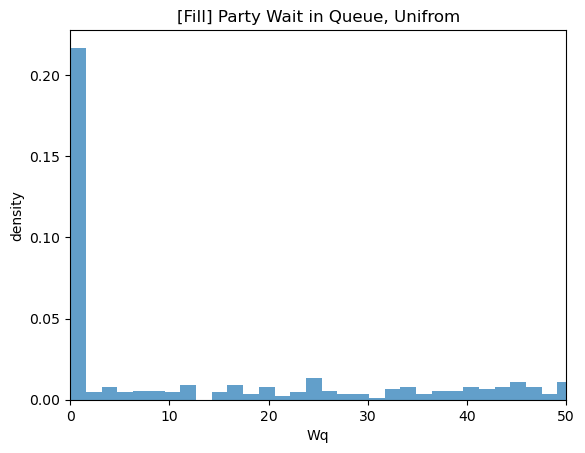

In [15]:
N = 1000

arrivals = rng.uniform(0,5, size=N)
sizes = np.random.randint(1, 6, size=N)

avg_waits,weight,lines,parties = CreatePartyFill(arrivals,sizes)

plt.figure()
plt.hist(avg_waits, bins=100, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("[Fill] Party Wait in Queue, Unifrom")
plt.xlim(0, 50)

s = pd.Series(avg_waits)
s.describe()

party_sample_unif = s

### Repeated N=1000 Uniform Fill Trials by Individual

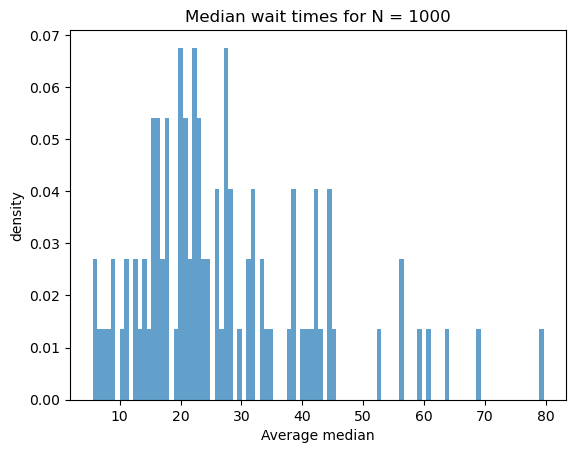

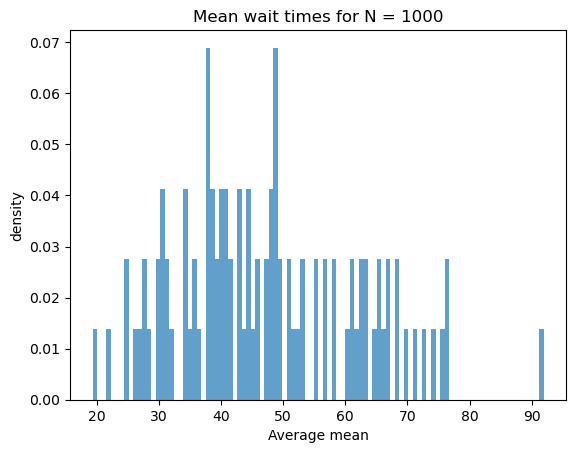

In [16]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0,5, size=N)
    sizes = np.random.randint(1, 6, size=N)

    avg_waits,weight,dfl,parties = CreatePartyFill(arrivals,sizes)

    s = pd.Series(avg_waits)
    means.append(s.describe()[1])
    medians.append(s.describe()[5])


plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median"); plt.ylabel("density"); plt.title("Median wait times for N = 1000")

plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean"); plt.ylabel("density"); plt.title("Mean wait times for N = 1000")

party_means_unif = pd.Series(means)
party_meds_unif = pd.Series(medians)

### Fill Test when N = 1000 Uniform by Individual

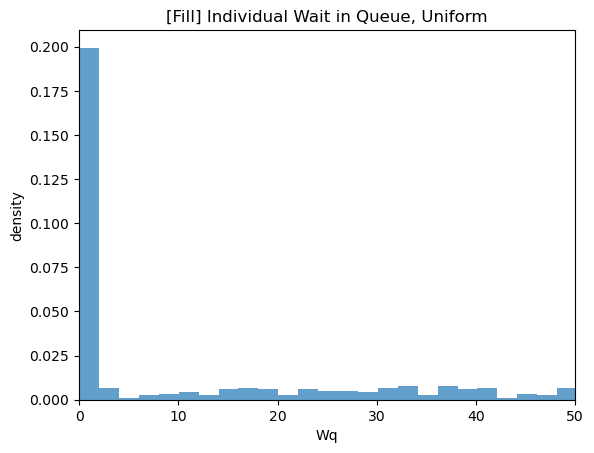

In [17]:
N = 1000

arrivals = rng.uniform(0,5, size=N)
sizes = np.random.randint(1, 6, size=N)

avg_waits,weight,lines,parties = CreatePartyFill(arrivals,sizes)

plt.figure()
plt.hist(avg_waits, bins=100, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("[Fill] Individual Wait in Queue, Uniform")
plt.xlim(0, 50)

s = pd.Series(weight)
s.describe()

ind_sample_unif = s

### Repeated N=1000 Uniform Fill Trials by Individual

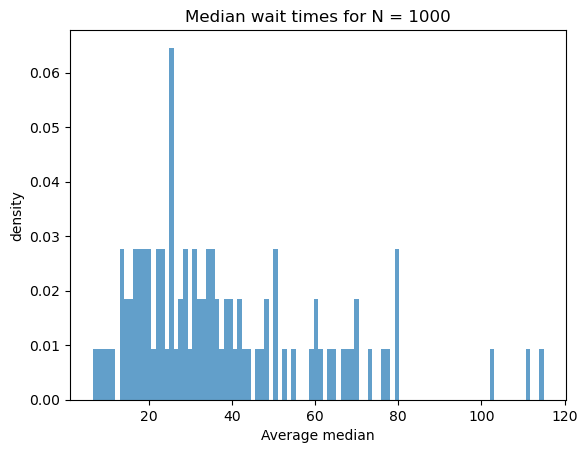

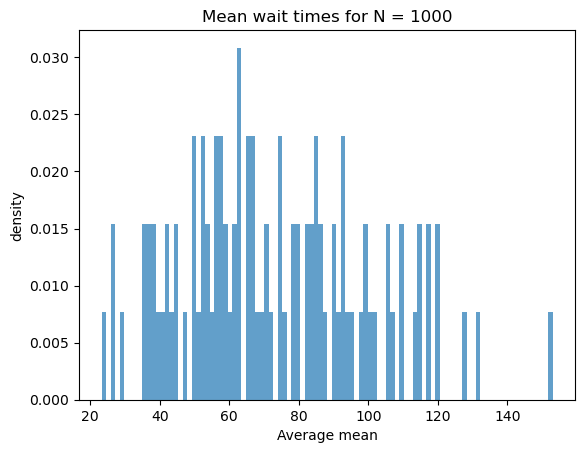

In [18]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0,5, size=N)
    sizes = np.random.randint(1, 6, size=N)

    avg_waits,weight,lines,parties = CreatePartyFill(arrivals,sizes)

    s = pd.Series(weight)
    means.append(s.describe()[1])
    medians.append(s.describe()[5])


plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median"); plt.ylabel("density"); plt.title("Median wait times for N = 1000")

plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean"); plt.ylabel("density"); plt.title("Mean wait times for N = 1000")

ind_means_unif = pd.Series(means)
ind_meds_unif = pd.Series(medians)

## Conclusion

In [19]:
print(party_sample_unif.describe())
print()
print("Average party mean across 100 trials:",party_means_unif.mean())
print("Average party median across 100 trials:",party_meds_unif.mean())
print()
print(ind_sample_unif.describe())
print()
print("Average individual mean across 100 trials:",ind_means_unif.mean())
print("Average individual median across 100 trials:",ind_meds_unif.mean())

count    565.000000
mean      38.546742
std       40.535136
min        0.000000
25%        0.000000
50%       30.609993
75%       64.412072
max      158.422831
dtype: float64

Average party mean across 100 trials: 47.393723818360996
Average party median across 100 trials: 27.203557300919847

count    582.000000
mean      66.006874
std       78.200353
min        0.000000
25%        0.000000
50%       32.625372
75%      123.552366
max      264.574624
dtype: float64

Average individual mean across 100 trials: 72.96501937205086
Average individual median across 100 trials: 37.96810583854822


In [55]:
# Testing

arrivals = rng.uniform(0,5, size=1000)
sizes = np.random.randint(1, 6, size=N)
#print(sizes)

avg_waits,weight,lines,parties = CreatePartyFill(arrivals,sizes)

'''print("paired teams:")
for p in parties:
    print('[',end=' ')
    for x in p:
        print(x[1],end=' ')
    print(']')

print("unpaired teams:")
for l in lines:
    print('[',end=' ')
    for x in l:
        print(x[1],end=' ')
    print(']')'''

print(len(parties))
print(len(lines))

foo = []
for p in parties:
    foo.append(len(p))
    #print(len(p))
print(sum(foo)/len(foo))

554
57
1.7021660649819494
